# Exemple d'implémentation de SVM en Python avec Scikit-learn
Cette exemple provient du livre : (Lee, Wei-Meng. Python Machine Learning. Wiley, 2019)

Un exemple simple permet de mieux comprendre les principes de base des machines à vecteurs de support et leur fonctionnement. Imaginons que nous ayons deux étiquettes : rouge et bleu, et que nos données aient deux caractéristiques : x et y. Nous voulons un classificateur qui, étant donné une paire de coordonnées (x,y), indique si elle est rouge ou bleue. 

Nous importons les bibliothèque nécessaire.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt


Lisons le fichier csv de données puis affichons quelques échantillons :

In [2]:
data = pd.read_csv('svm_datapoints.csv')
data.head()

,x1,x2,Y
0,0,0,A
1,1,1,A
2,2,3,B
3,2,0,A
4,3,4,B


Nous allons tracer les points déjà étiquetées sur un plan en utilisant Seaborn :

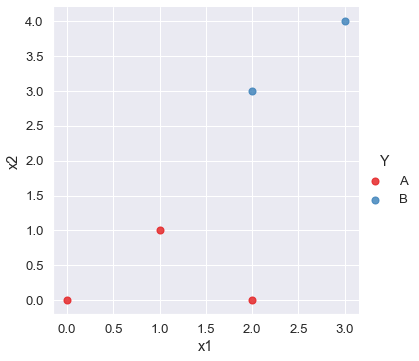

In [3]:
sns.lmplot(x='x1', y='x2', data=data, hue='Y', palette='Set1', fit_reg=False, scatter_kws={"s": 50});

# X1 = data['x1'].values
# X2 = data['x2'].values
# plt.scatter(X1,X2)


À l'aide des points de données que nous avons chargés précédemment, utilisons maintenant la classe SVC du module svm de Scikitlearn pour nous aider à obtenir la valeur des différentes variables que nous devons calculer. L'extrait de code suivant utilise le noyau linéaire pour résoudre le problème. Le noyau linéaire suppose que l'ensemble de données peut être séparé linéairement.

In [4]:
from sklearn import svm
#---Converting the Columns as Matrices---
points = data[['x1','x2']].values
result = data['Y'].values
clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

# print(classification_report(y_test, predictions)) 

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
np.abs(clf.dual_coef_))


Vector of weights (w) =  [0.4 0.8]
b =  -2.2
Indices of support vectors =  [1 2]
Support vectors =  [[1. 1.]
 [2. 3.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.4 0.4]]


### Traçage de l'hyperplan et des marges
Une fois les valeurs des variables obtenues, il est temps de tracer l'hyperplan et les deux marges qui l'accompagnent.
après avoir trouvé la pente et l'ordonnée à l'origine de la ligne, vous pouvez tracer l'hyperplan. C'est ce que fait l'extrait de code suivant :


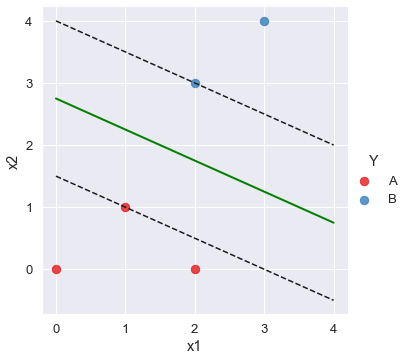

In [5]:
#---w is the vector of weights---
w = clf.coef_[0]
#---find the slope of the hyperplane---
slope = -w[0] / w[1]
b = clf.intercept_[0]
#---find the coordinates for the hyperplane---
xx = np.linspace(0, 4)
yy = slope * xx - (b / w[1])
#---plot the margins---

# s = clf.support_vectors_[0] #---first support vector---
# yy_down = slope * xx + (s[1] - slope * s[0])
yy_down = slope * xx - (b / w[1]) - (1 / w[1])
# s = clf.support_vectors_[-1] #---last support vector---
# yy_up = slope * xx + (s[1] - slope * s[0])
yy_up = slope * xx - (b / w[1]) + (1 / w[1])
#---plot the points---
sns.lmplot(x='x1', y='x2', data=data, hue='Y', palette='Set1',fit_reg=False, scatter_kws={"s": 70})
#---plot the hyperplane---
plt.plot(xx, yy, linewidth=2, color='green');
#---plot the 2 margins---
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.show()

L'extrait de code suivant utilise le modèle que vous avez entraîné pour effectuer des quelques prédictions:

In [6]:
print(clf.predict([[3,3]])[0]) # 'B'
print(clf.predict([[4,0]])[0]) # 'A'
print(clf.predict([[2,2]])[0]) # 'B'
print(clf.predict([[1,2]])[0]) # 'A'


B
A
B
A


### L'astuce du noyau (Kernel Trick)
Parfois, les points d'un ensemble de données ne sont pas toujours linéairement séparables. 
Cependant, avec la technique "kernel trick" ou l'astuce du noyau, il est possible de transformer les données vers un espace de dimension supérieure de sorte que, après la transformation, la marge de séparation entre les classes de données soit claire.

Nous pouvons ajouter une troisième dimension, disons l'axe z, et définir z comme étant :
Z = x2 + y2
Une fois que nous avons tracé les points à l'aide d'un graphique 3D, les points sont maintenant linéairement séparables. Il est difficile de visualiser ce phénomène à moins de tracer les points. C'est ce que fait l'extrait de code suivant :



<IPython.core.display.Javascript object>


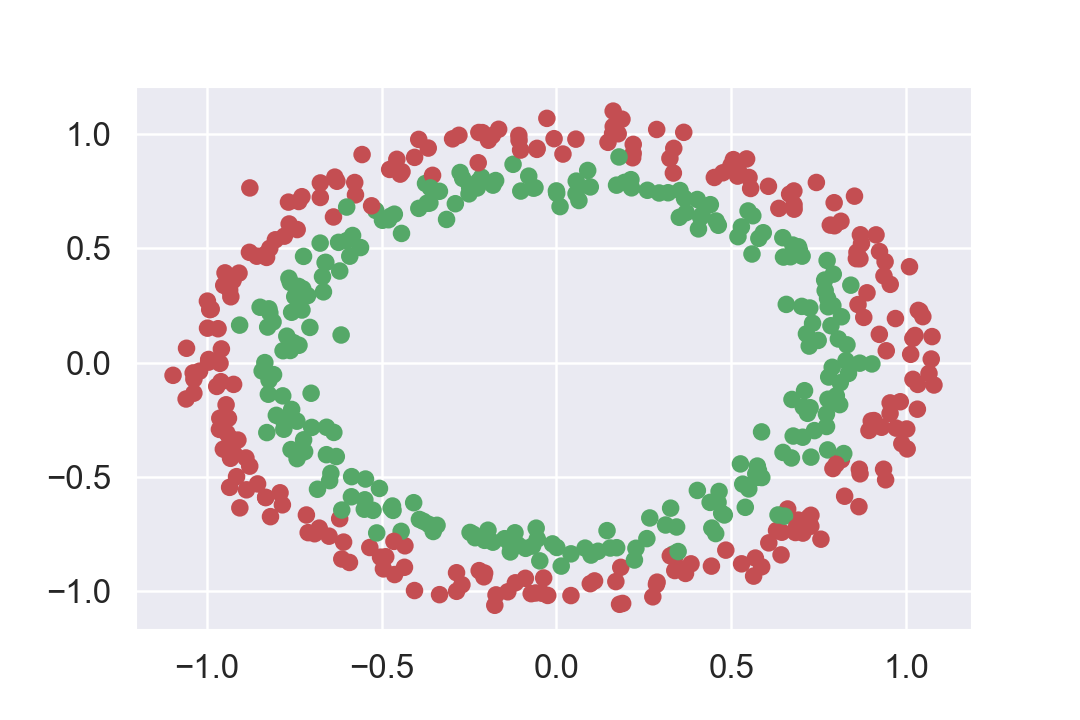

<IPython.core.display.Javascript object>


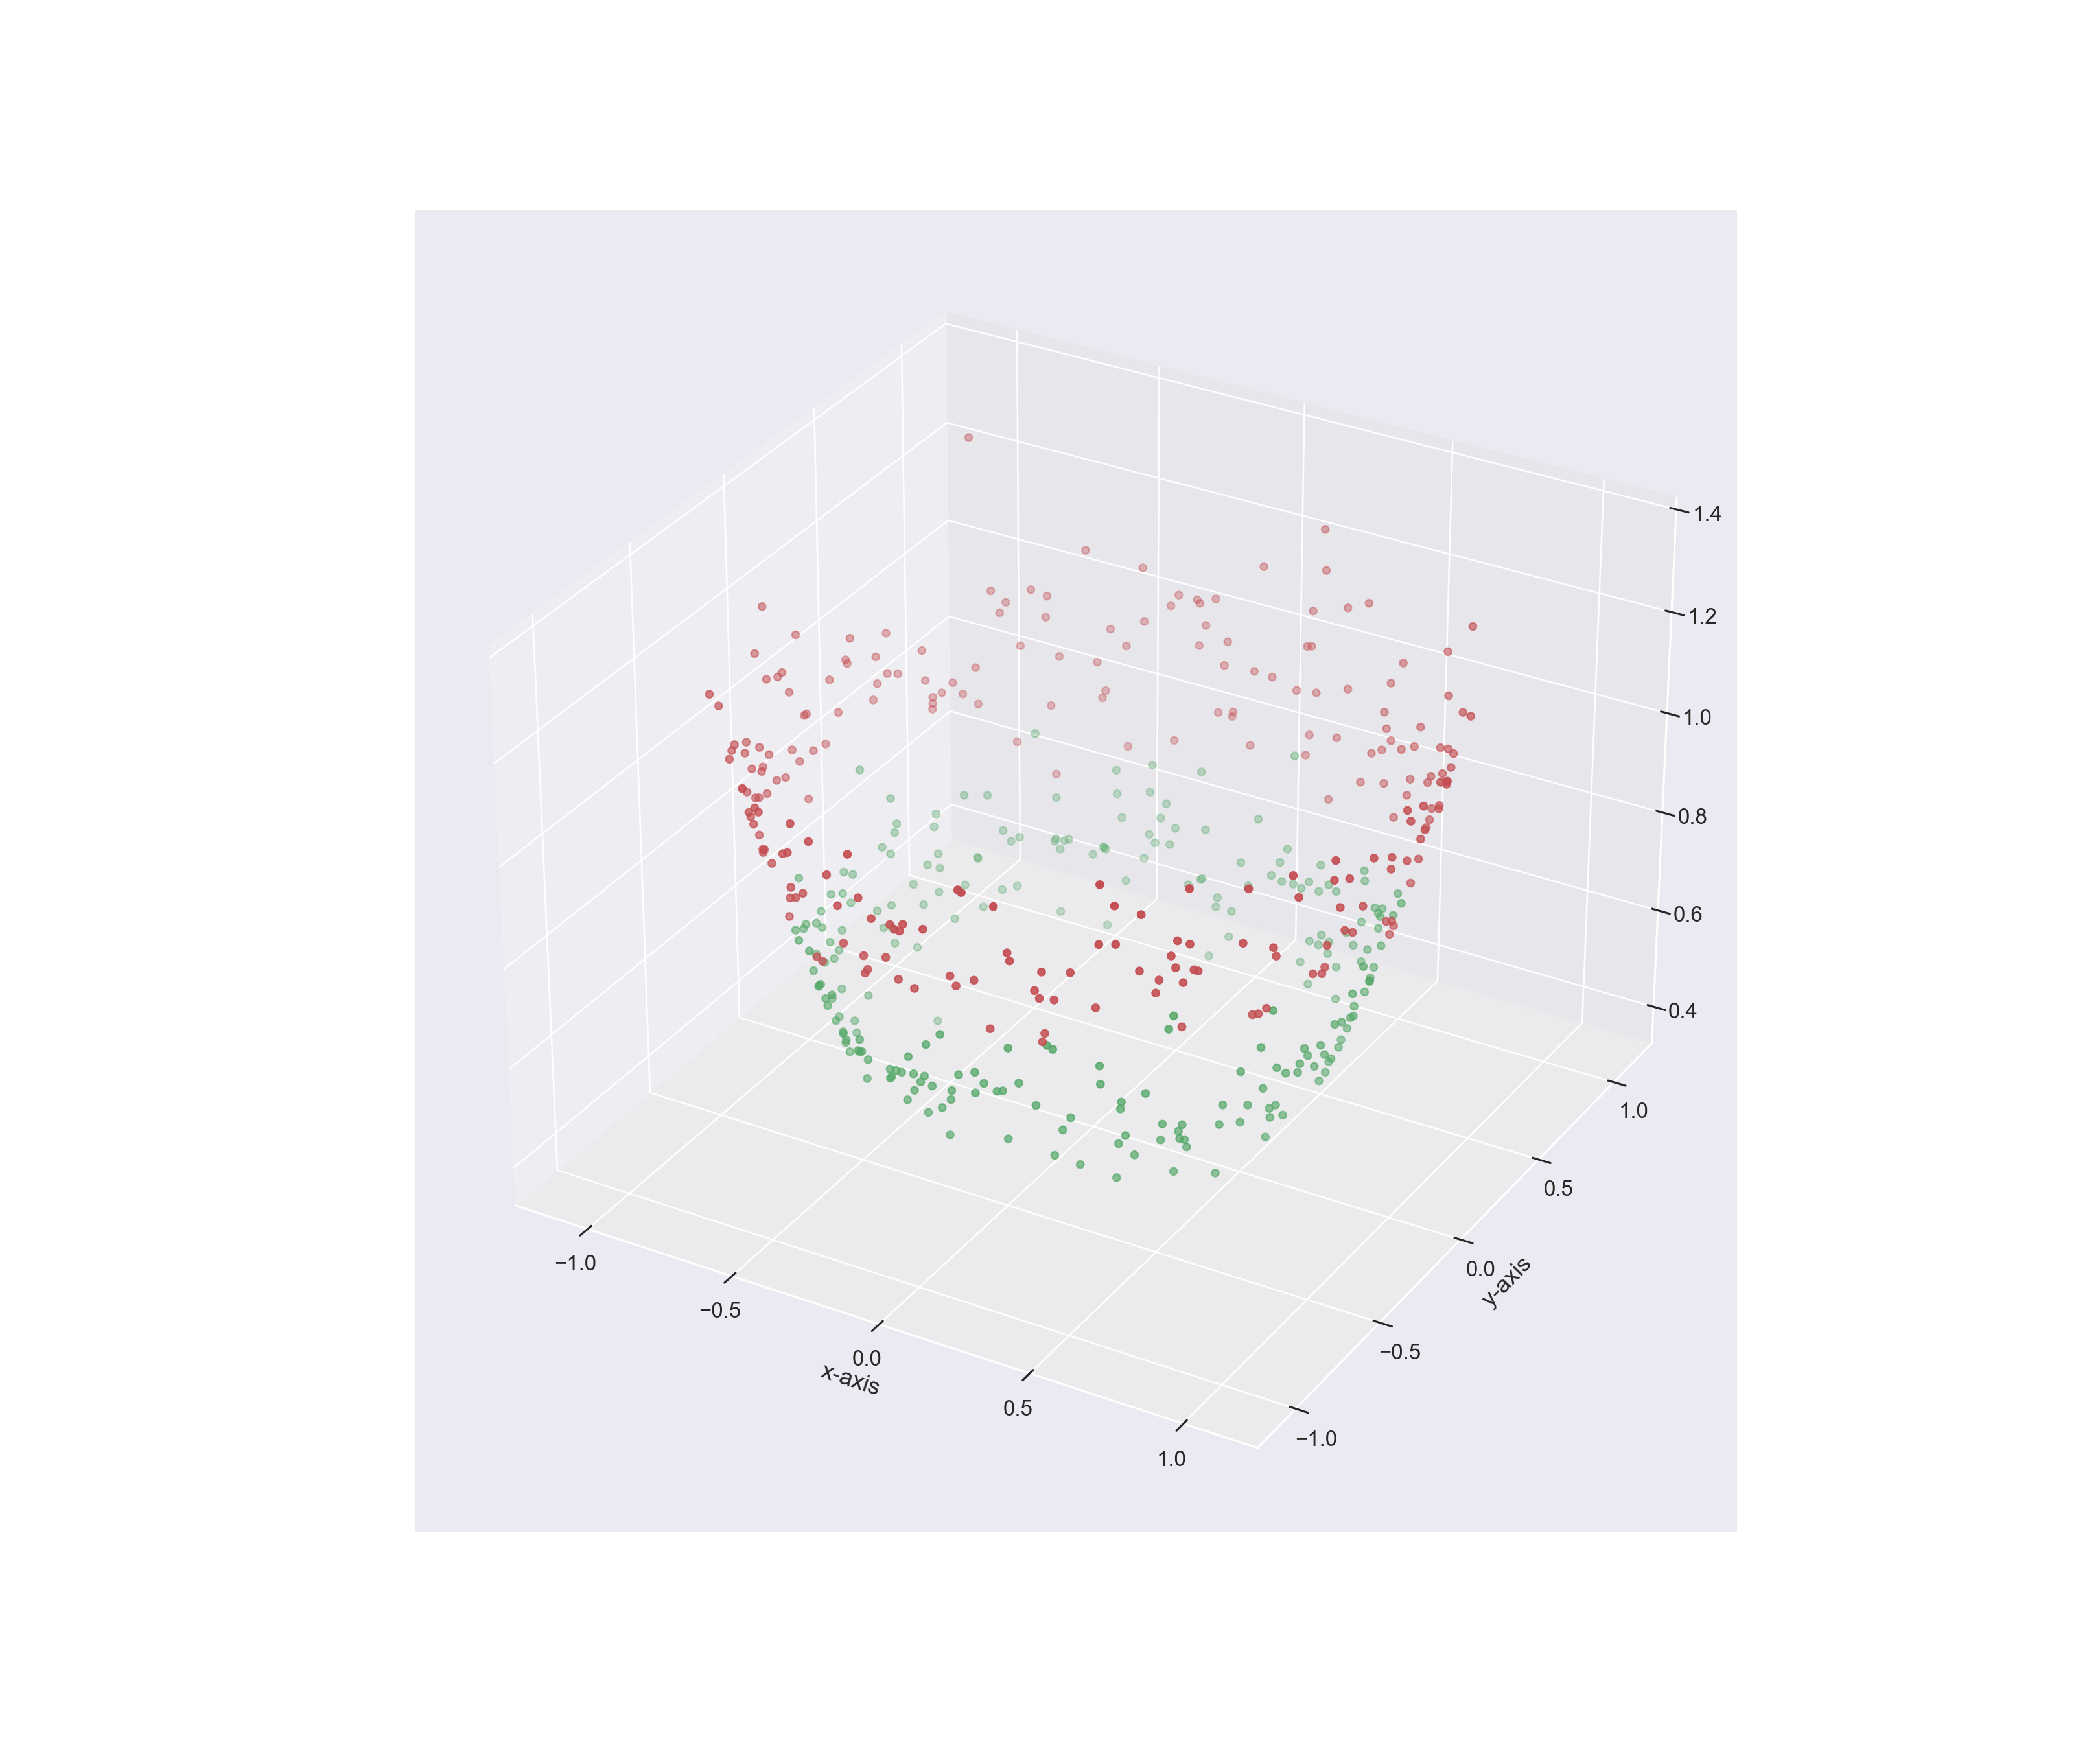

In [7]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.05)
rgb = np.array(['r', 'g'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[c])
plt.show()
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
z = X[:,0]**2 + X[:,1]**2
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()


Donc, nous avons créer deux ensembles de points aléatoires (500 points au total) répartis de façon circulaire en utilisant la fonction *make_circles()*. Nous l'avons traçé ensuite sur un graphique 2D. Nous avons ajouté ensuite un troisième axe, l'axe z, et nous avons traçé le graphique en 3D.

### Traçage de l'hyperplan 3D
Avec les points tracés dans un graphique 3D, entraînons maintenant le modèle en utilisant la troisième dimension:


In [8]:
#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)
#---use SVM for training---
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)


SVC(kernel='linear')

Tout d'abord, nous avons combiné les trois axes en un seul ndarray à l'aide de la fonction *np.concatenate()*. Nous avons ensuite entraîné le modèle comme d'habitude. 

---
L'équation de la frontière de décision du SVM, qui est :

$$
w_1 x_1+w_2 x_2+w_3 x_3+b=0
$$


Ici, $w_1, w_2$, et $w_3$ sont des coefficients, et b est l'ordonnée à l'origine (intercept). Pour résoudre $x_3$
  (la troisième caractéristique), l'équation est réarrangée comme suit :

$$
x_3=\frac{-b-w_1 x_1-w_2 x_2}{w_3}
$$

L'étape suivante consiste à dessiner l'hyperplan en 3D. Pour ce faire, vous devez trouver la valeur de x3, qui peut être calculée comme suit:

**x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x - clf.coef_[0][1] * y) /
clf.coef_[0][2]**





Le fragment de code complet est le suivant :

<IPython.core.display.Javascript object>


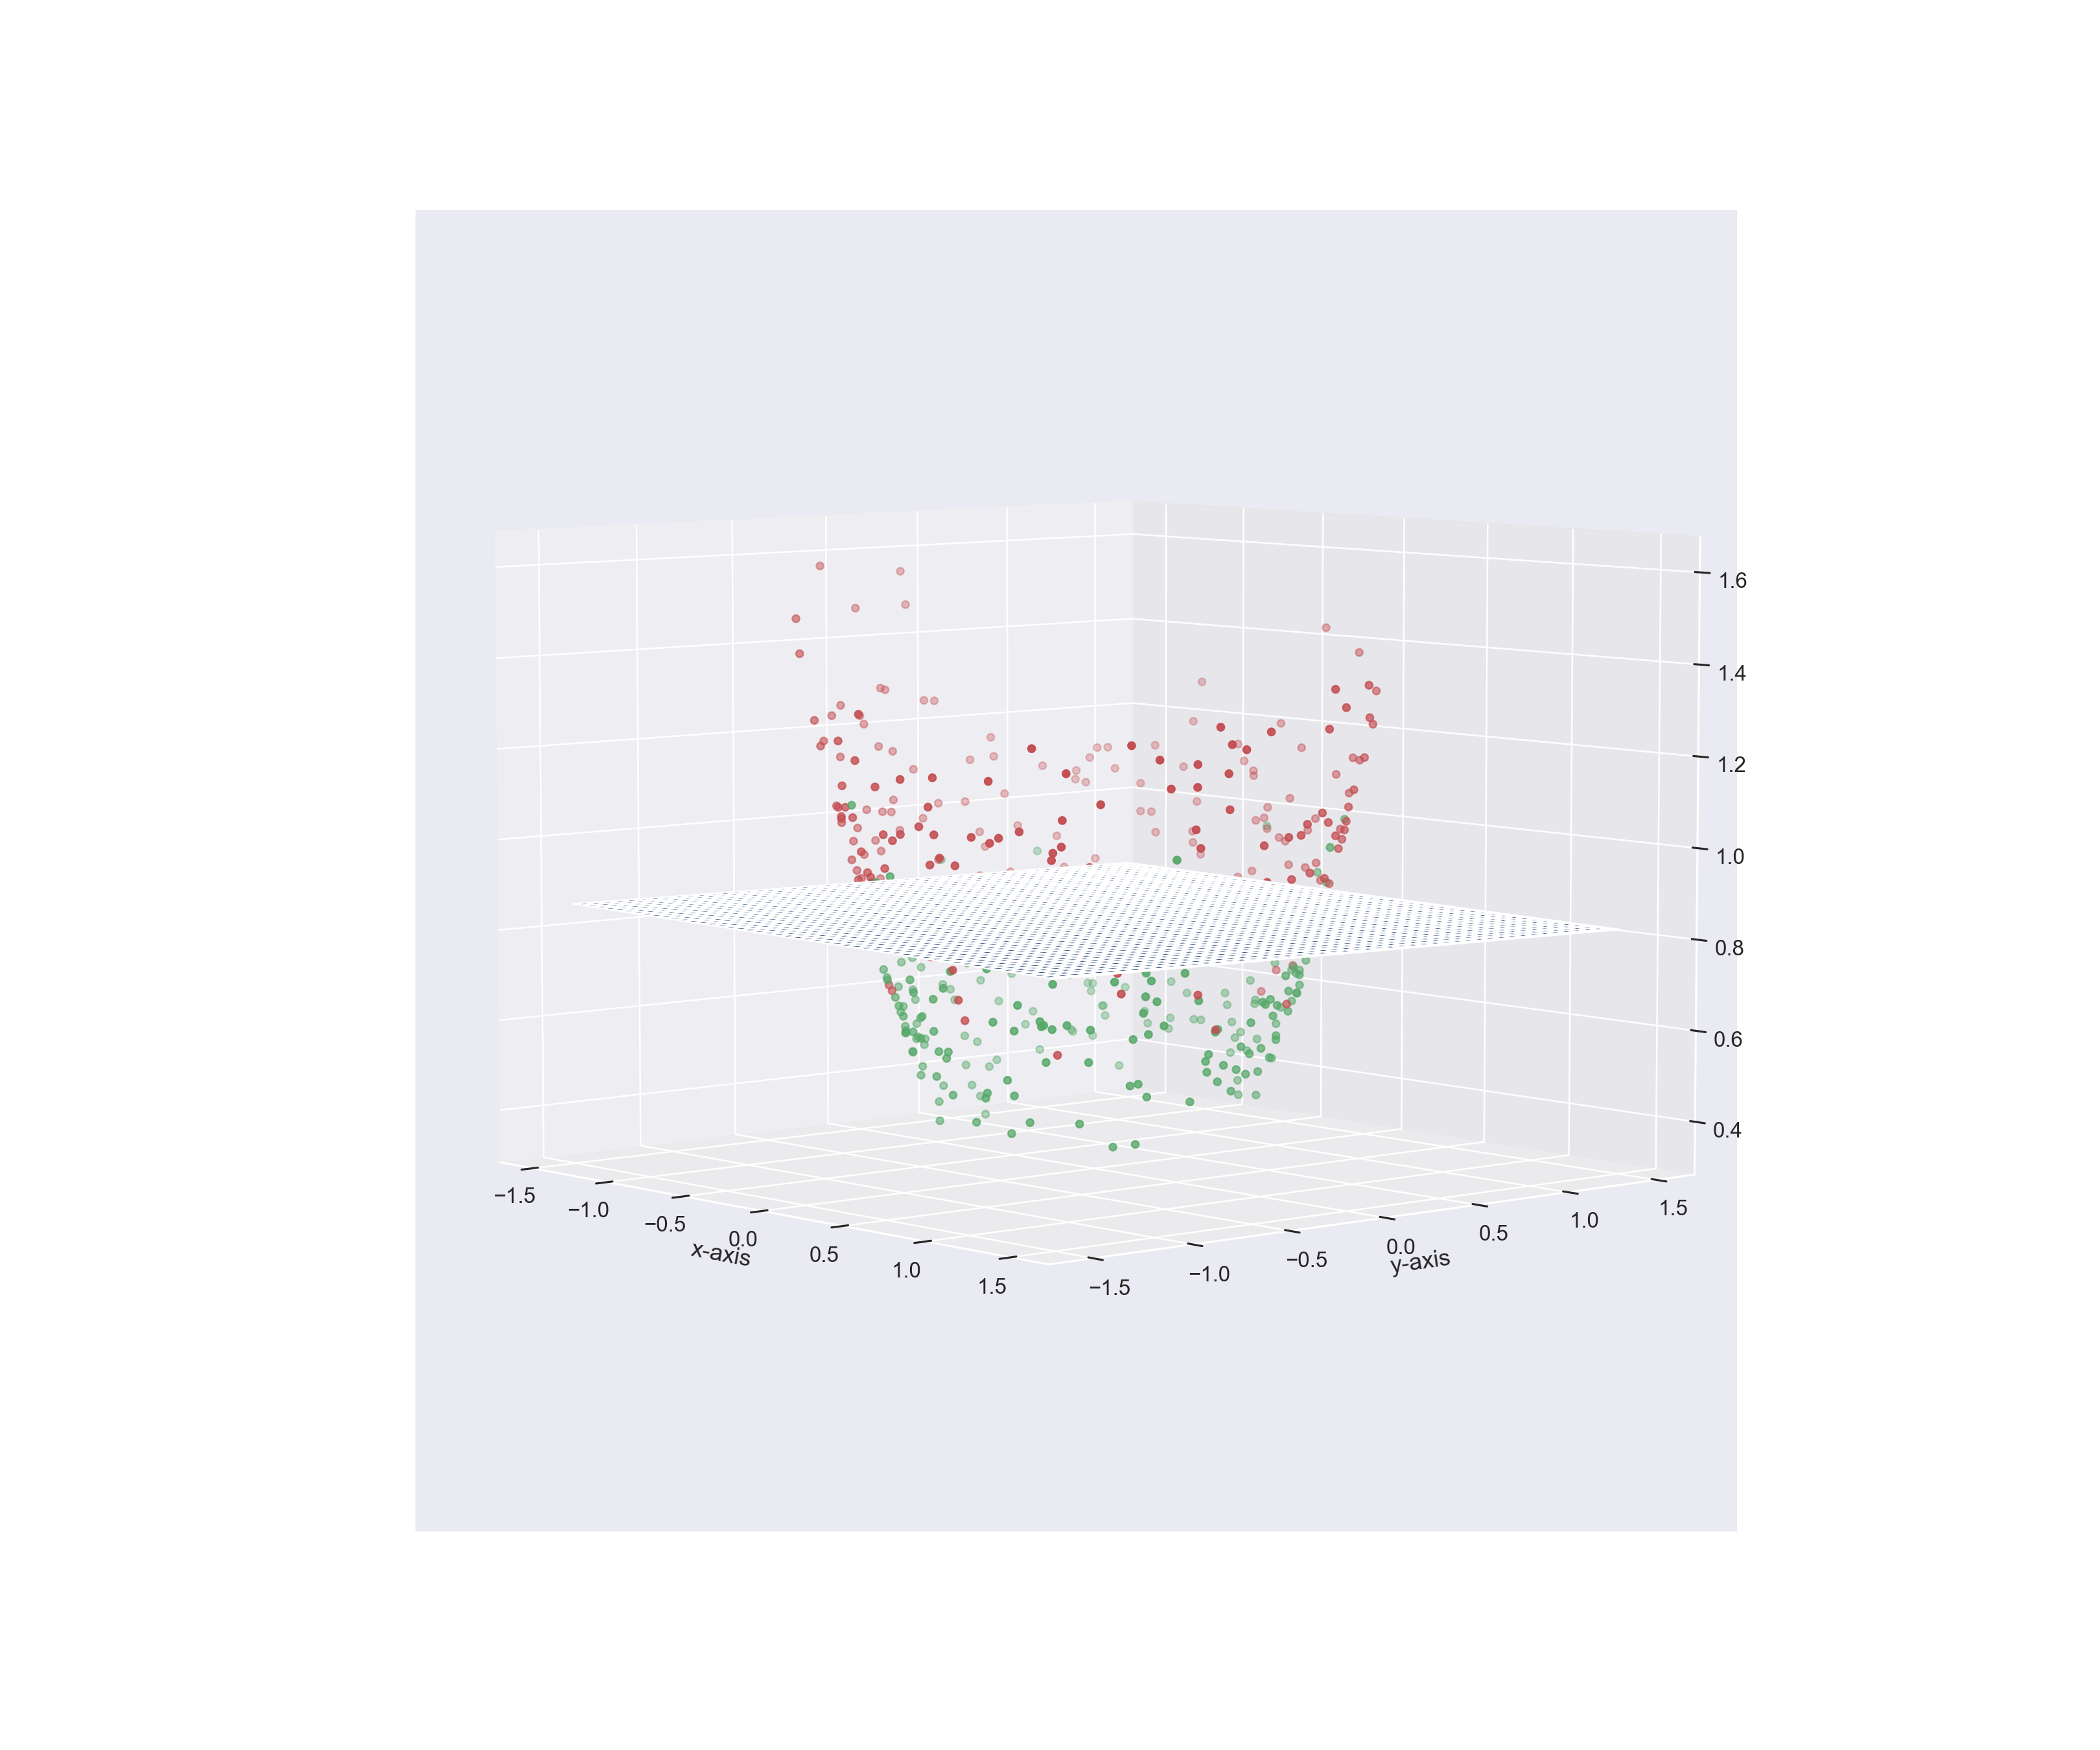

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
z = X[:,0]**2 + X[:,1]**2

rgb = np.array(['r', 'g'])

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
# plt.show()

#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)

#---use SVM for training---
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1]* y) / clf.coef_[0][2]
tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)

ax.plot_surface(x, y, x3(x,y))
plt.show()
